## Stochastic Optimization

After checking the "Global and Stochastic Optimization" section of the Optimization Task View. It's obvious that there are much more algorithms for global and stochastic optimization. We will consider simulated annealing, cross-enropy and genetic algorithms.

### Simulated Annealing

The documentation thankfully has a good example from which this is inspired.

In [2]:
library(GenSA)

Rastrigin <- function(x, A=10)    A*length(x) + sum(x^2 - A*cos(2*pi*x))


dimension <- 30                          #  Let's make the problem harder
global_min <- 0                          #  Something we know about the function that can help us stop the algorithm
tol <- 1e-13                             #  We'll call the results "satisfactory" if we get within this tolerance of the global minimum
lower <- rep(-5.12, dimension)           #  The lower bound of the components (again, as if we knew this about the function)
upper <- rep(5.12, dimension)            #  The upper bound of the components 

temperature <- 100                       #  The initial temperature (how often should it be bouncing initially)

par = runif(dimension, lower, upper)     #  Generate a random starting point

out <- GenSA(lower = lower, upper = upper, fn = Rastrigin, control=list(threshold.stop=global_min+tol, temperature=temperature))

cat("The minimum value found was ", out$value, " at ", out$par[c(1:5)], "... after ", out$counts, " iterations.")

The minimum value found was  0  at  1.152604e-10 5.85769e-11 1.270108e-11 -5.695773e-11 -1.642643e-11 ... after  71597  iterations.

The algorithm specific parameters that GenSA takes are the initial temperature and two more parameters related to the visiting and acceptance distributions. All of these are important, it's quite odd that there is no way to set a custom schedule for the temperature but if there were that would have been important as well.

The initial value is of course as well an important option but there are no magical ways to set it to obtain impressive results in the general sense.

### Genetic Algorithm

In [20]:
library(GA)

Rastrigin <- function(x, A=10)    A*length(x) + sum(x^2 - A*cos(2*pi*x))

dimension <- 30                          #  Let's make the problem harder
lower <- rep(-5.12, dimension)           #  The lower bound of the components (again, as if we knew this about the function)
upper <- rep(5.12, dimension)            #  The upper bound of the components 

popsize = 20000                           # population size
pcrossover = 0.4                          # probability of crossover
pmutation = 0.03                          # probability of mutation
elitism = 0.15                            # elitism


out <- ga(type = "real-valued", fitness = function(x) -Rastrigin(x), lower = lower, upper = upper, 
          run = 500, popSize=popsize, pcrossover = pcrossover, pmutation = pmutation, elitism=elitism)

summary(out)

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  20000 
Number of generations =  100 
Elitism               =  0 
Crossover probability =  0.4 
Mutation probability  =  0.03 
Search domain = 
         x1    x2    x3    x4    x5    x6    x7    x8    x9   x10  ...    x29
lower -5.12 -5.12 -5.12 -5.12 -5.12 -5.12 -5.12 -5.12 -5.12 -5.12       -5.12
upper  5.12  5.12  5.12  5.12  5.12  5.12  5.12  5.12  5.12  5.12        5.12
        x30
lower -5.12
upper  5.12

GA results: 
Iterations             = 100 
Fitness function value = -2.202157 
Solution = 
              x1          x2          x3          x4         x5          x6
[1,] 0.003085598 -0.01432423 0.003623408 0.000497891 0.02638215 0.001487015
              x7          x8          x9        x10  ...          x29
[1,] -0.03675789 0.005706646 -0.03222758 0.05183344       0.001600318
              x30
[1,] -0.002013398

The genetic algorithm involves many important parameters. Four key examples of such parameters are the population size, survival rate (elitism), crossover and mutation probabilities.

Setting such parameters to give better results can be sometimes tricky. The basic observation is that GA can be thought of as an instance of local beam search. Local beam search is surely optimal when the population size approach infinity. Thus, the easiest way to get better results while sacrificing computational time is to increase the population size. In this, we tried to increase it such that the minima reach is not that bad and the runtime is not that long.

Other parameters like the probability of mutation won't always change the results as intended but sure a too high mutation probability will cause the algorithm to be just randomly searching.

The GA library is nice enough to provide a way to plot how the fitness function changed over time through the search. This should be decreasing but remember we negated the fitness function.

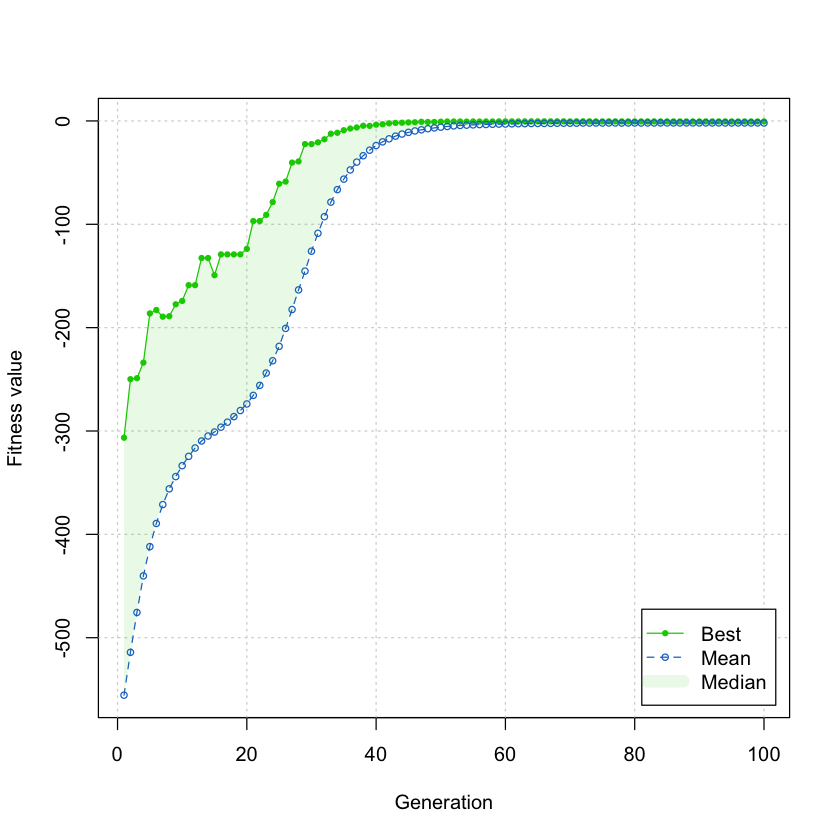

In [4]:
par(bg='white') 
plot(out)

### Cross-Entropy Optimizer

We will keep it easy this time and optimize the Rastrigin in 2D

In [22]:
library(CEoptim)

# Algorithm Parameters
μ <- c(3.5,6.2)                                    # The initial mean
σ <- c(12,14)                                        # The inital standard deviation
ρ <- 0.3                                           # The elite proportion

# Let's try a few different values of N to see which optimizes the function better
Ns <- c(1000L, 5000L, 50000L)                      # The values of N to try

# Lets make a table for the results
results <- matrix(ncol=4, nrow=length(Ns))
colnames(results) <- c("N", "Optimum Value", "Number of Iterations", "Convergence")


# Loop through each value of N and run the optimization
for (i in 1:length(Ns)) {
  result <- CEoptim(Rastrigin, continuous=list(mean=μ , sd=σ), rho=ρ, N=Ns[i], maximize=FALSE, noImproveThr = 10)

  results[i,] <- c(Ns[i], result$optimum, result$termination$niter, result$termination$convergence)
}

results

N,Optimum Value,Number of Iterations,Convergence
1000,4.78230568035087e-07,28,Variance converged
5000,6.11527145366608e-07,26,Variance converged
50000,1.04520836430311e-09,28,Variance converged


These seem like the poorest results we have so far. No doubts why this wasn't covered at my uni. Of course we can always cheat by letting the mean be something near $(0,0)$ to observe much better convergence.